## Regression Models Comparison

In this notebook we will try and compare the performance of various regression models. Following models will be tested and compared - 
 - Linear Regression
 - Decision Trees Regressor
 - Random Forest Regressor
 - XGBoost Reegressor

## 1. Import key libraries & clean data

In [72]:
######################################################
# Importing libraries
######################################################

import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

# model prep
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# model metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

In [22]:
######################################################
# Read data & explore
######################################################

car_data = pd.read_csv('data/cars_data.csv')
print('Shape of the datasets :', car_data.shape)
car_data.head()

Shape of the datasets : (428, 15)


Make           Model   Type Origin DriveTrain     MSRP  Invoice  \
0  Acura             MDX    SUV   Asia        All  $36,945  $33,337   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  $23,820  $21,761   
2  Acura         TSX 4dr  Sedan   Asia      Front  $26,990  $24,647   
3  Acura          TL 4dr  Sedan   Asia      Front  $33,195  $30,299   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  $43,755  $39,014   

   EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0         3.5        6.0         265        17           23    4451   
1         2.0        4.0         200        24           31    2778   
2         2.4        4.0         200        22           29    3230   
3         3.2        6.0         270        20           28    3575   
4         3.5        6.0         225        18           24    3880   

   Wheelbase  Length  
0        106     189  
1        101     172  
2        105     183  
3        108     186  
4        115     197

In [23]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
Make           428 non-null object
Model          428 non-null object
Type           428 non-null object
Origin         428 non-null object
DriveTrain     428 non-null object
MSRP           428 non-null object
Invoice        428 non-null object
EngineSize     428 non-null float64
Cylinders      426 non-null float64
Horsepower     428 non-null int64
MPG_City       428 non-null int64
MPG_Highway    428 non-null int64
Weight         428 non-null int64
Wheelbase      428 non-null int64
Length         428 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 50.2+ KB


In [24]:
# check for unique values and null data
for c in car_data.columns:
    print('**************************************************')
    print('Column Name - ', c)
    print('Column type - ', car_data[c].dtype)
    print('Null values -', car_data[c].isnull().sum())
    print('Number of Unique values - ', len(car_data[c].unique()))

**************************************************
Column Name -  Make
Column type -  object
Null values - 0
Number of Unique values -  38
**************************************************
Column Name -  Model
Column type -  object
Null values - 0
Number of Unique values -  425
**************************************************
Column Name -  Type
Column type -  object
Null values - 0
Number of Unique values -  6
**************************************************
Column Name -  Origin
Column type -  object
Null values - 0
Number of Unique values -  3
**************************************************
Column Name -  DriveTrain
Column type -  object
Null values - 0
Number of Unique values -  3
**************************************************
Column Name -  MSRP
Column type -  object
Null values - 0
Number of Unique values -  410
**************************************************
Column Name -  Invoice
Column type -  object
Null values - 0
Number of Unique values -  425
***************

from above exploration we can see that the following columns need corrections - 
- MSRP : needs to be converted to numeric after correcting \$ sign and comma
- Invoice : needs to be converted to numeric after correcting \$ sign and comma
- cylinders : replace missing values

In [25]:
# replacing missing values of cylinders with median value
mean_cyl = car_data[car_data['Cylinders'].notnull()]['Cylinders'].mean()
med_cyl = car_data[car_data['Cylinders'].notnull()]['Cylinders'].median()
print('Mean :',mean_cyl, ' Median :',med_cyl)
print(car_data['Cylinders'].unique())

car_data.loc[car_data['Cylinders'].isnull(), 'Cylinders'] = med_cyl
print(car_data['Cylinders'].unique())

Mean : 5.807511737089202  Median : 6.0
[ 6.  4.  8. 10.  3. nan 12.  5.]
[ 6.  4.  8. 10.  3. 12.  5.]


In [26]:
# claen up the MSRP and Invoice columns
car_data['MSRP'] = car_data['MSRP'].str.replace("$","")
car_data['MSRP'] = car_data['MSRP'].str.replace(",","")
car_data['MSRP'] = car_data['MSRP'].astype(int)
car_data['Invoice'] = car_data['Invoice'].str.replace("$","")
car_data['Invoice'] = car_data['Invoice'].str.replace(",","")
car_data['Invoice'] = car_data['Invoice'].astype(int)
print(car_data.info())
car_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
Make           428 non-null object
Model          428 non-null object
Type           428 non-null object
Origin         428 non-null object
DriveTrain     428 non-null object
MSRP           428 non-null int64
Invoice        428 non-null int64
EngineSize     428 non-null float64
Cylinders      428 non-null float64
Horsepower     428 non-null int64
MPG_City       428 non-null int64
MPG_Highway    428 non-null int64
Weight         428 non-null int64
Wheelbase      428 non-null int64
Length         428 non-null int64
dtypes: float64(2), int64(8), object(5)
memory usage: 50.2+ KB
None


Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [27]:
# see the summary of numeric variables
car_data.describe()

MSRP        Invoice  EngineSize   Cylinders  Horsepower  \
count     428.000000     428.000000  428.000000  428.000000  428.000000   
mean    32774.855140   30014.700935    3.196729    5.808411  215.885514   
std     19431.716674   17642.117750    1.108595    1.554844   71.836032   
min     10280.000000    9875.000000    1.300000    3.000000   73.000000   
25%     20334.250000   18866.000000    2.375000    4.000000  165.000000   
50%     27635.000000   25294.500000    3.000000    6.000000  210.000000   
75%     39205.000000   35710.250000    3.900000    6.000000  255.000000   
max    192465.000000  173560.000000    8.300000   12.000000  500.000000   

         MPG_City  MPG_Highway       Weight   Wheelbase      Length  
count  428.000000   428.000000   428.000000  428.000000  428.000000  
mean    20.060748    26.843458  3577.953271  108.154206  186.362150  
std      5.238218     5.741201   758.983215    8.311813   14.357991  
min     10.000000    12.000000  1850.000000   89.000000  143.000000  
25%     17.000000    24.000000  3104.000000  103.000000  178.000000  
50%     19.000000    26.000000  3474.500000  107.000000  187.000000  
75%     21.250000    29.000000  3977.750000  112.000000  194.000000  
max     60.000000    66.000000  7190.000000  144.000000  238.000000

## 2. Data visualization

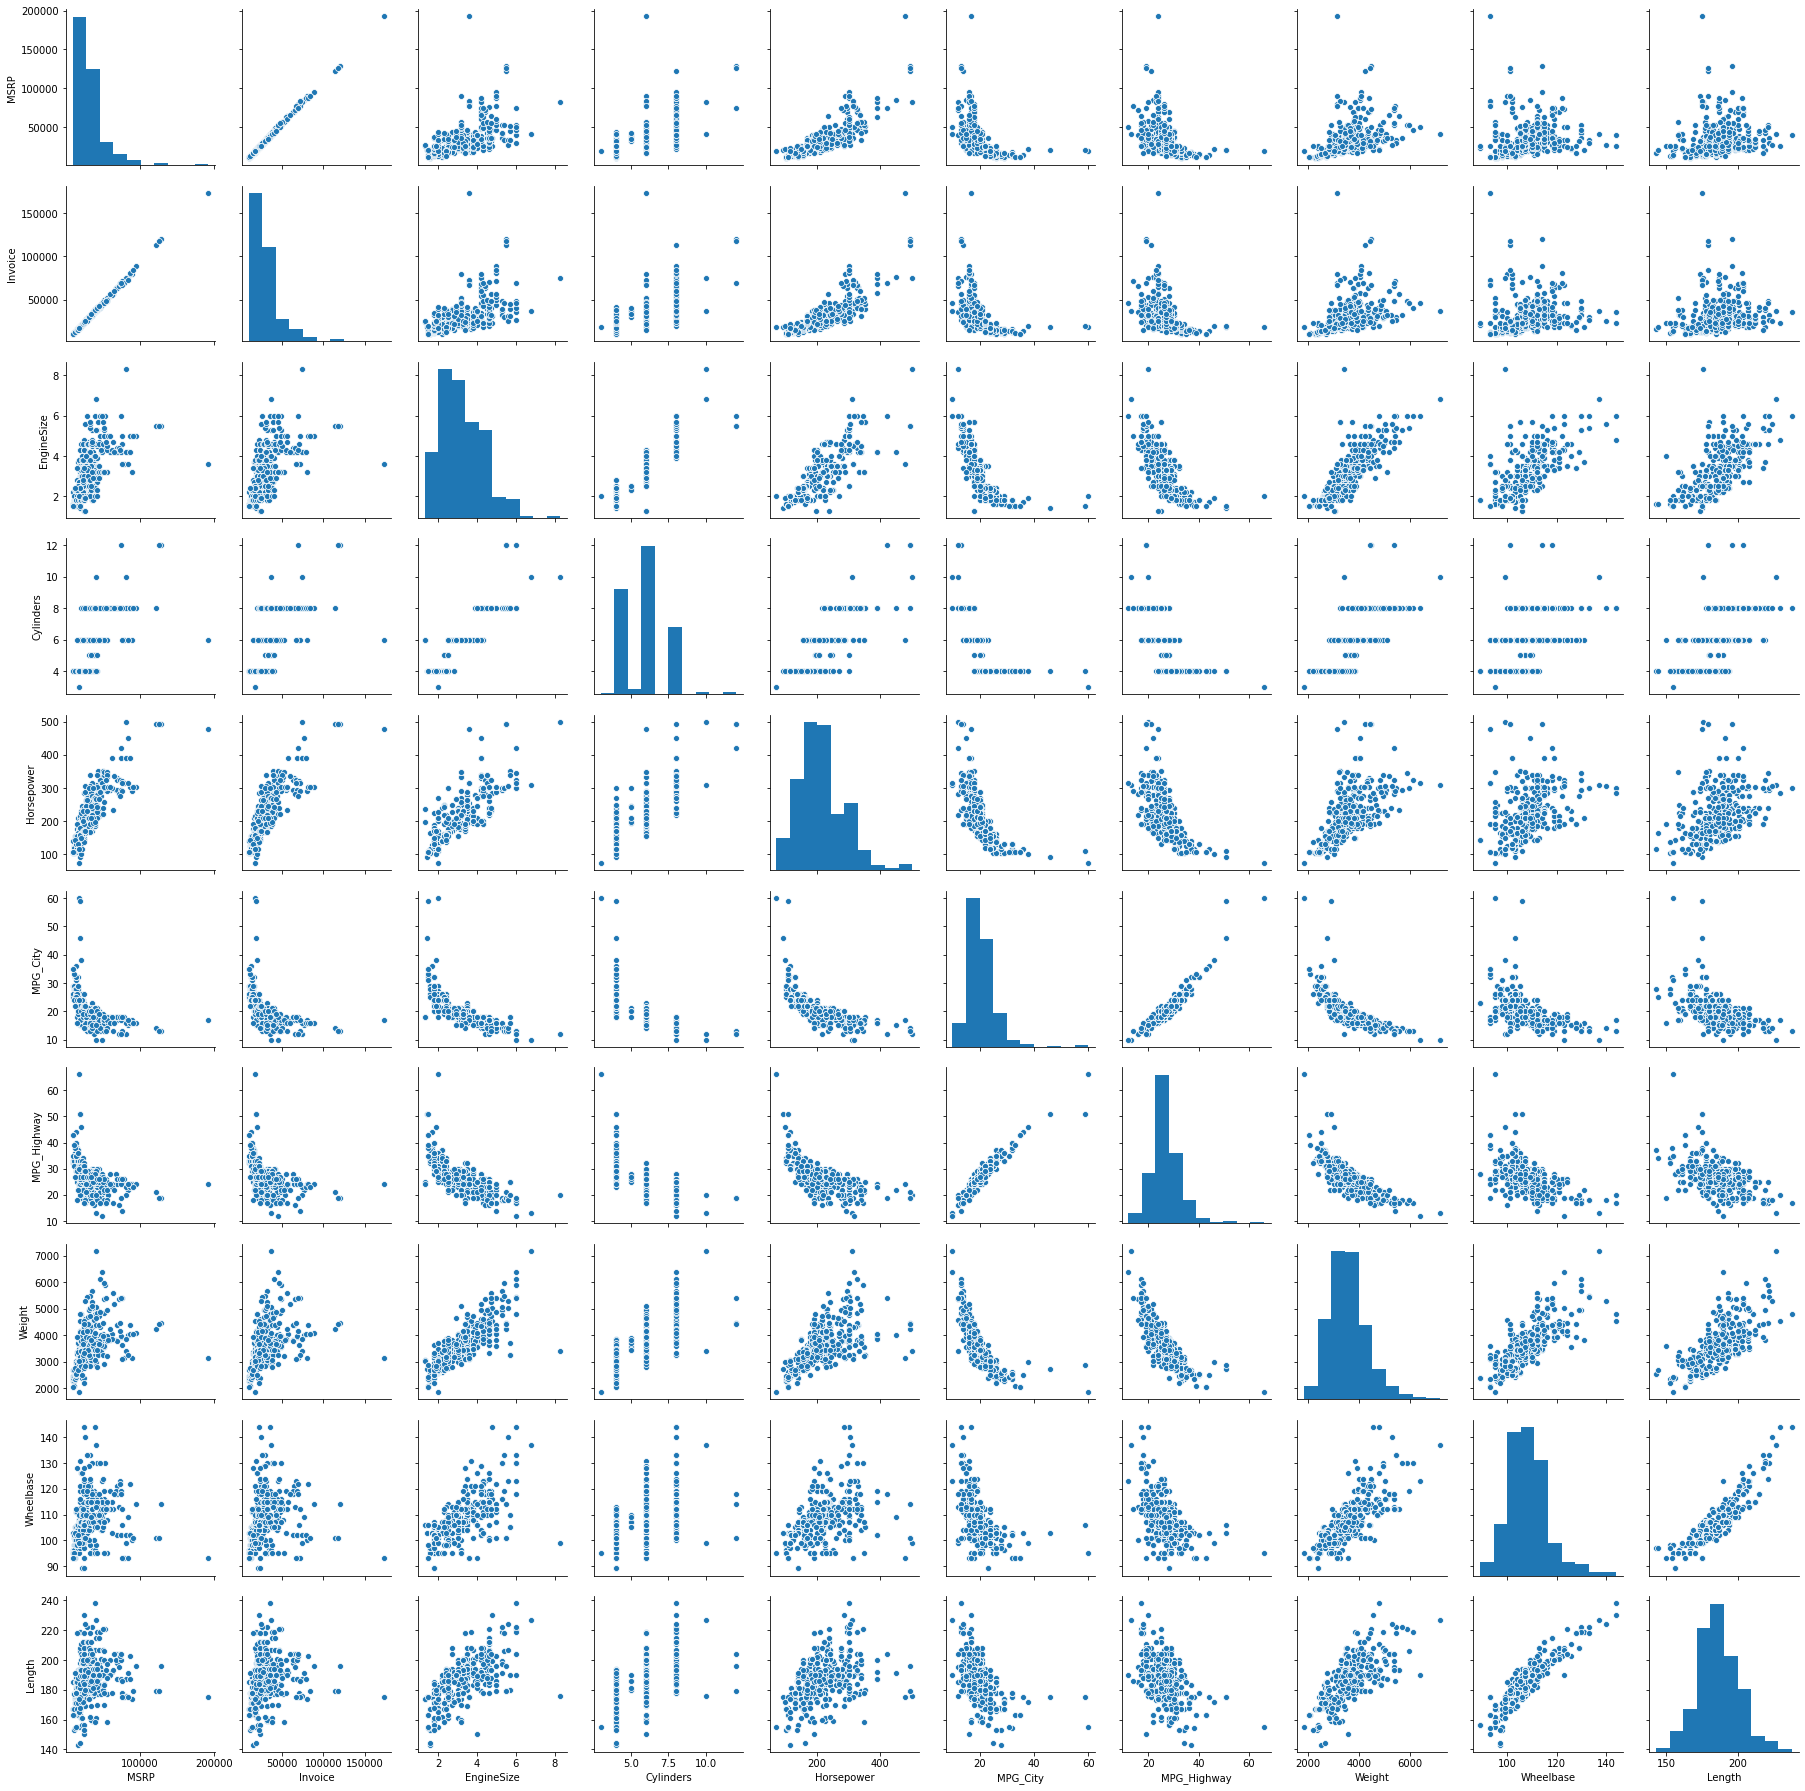

In [28]:
####################################################
# scatterplot for joint relationship and histograms for univariate distribution
####################################################

sns.pairplot(data=car_data)

In [29]:
####################################################
# histograms for the categorical variables
####################################################

fig = px.histogram(data_frame=car_data, x='Make', labels={'Make':'Manufacturer'}, title='Make of the car',\
                  color_discrete_sequence=['maroon'])
fig.show()

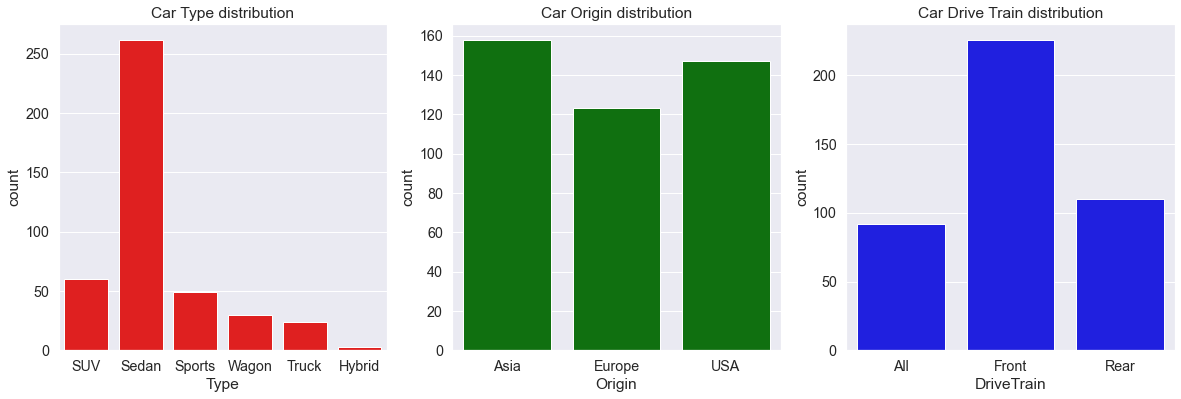

In [45]:
# histogram for the rest three variables - Type, Origin, DriveTrain
sns.set(style='darkgrid', font_scale=1.3)
fig, ax = plt.subplots(1,3,figsize=(20,6))

ax1 = sns.countplot(data=car_data, x='Type', color='red', ax=ax[0])
ax1.set_title("Car Type distribution")

ax2 = sns.countplot(data=car_data, x='Origin', color='green', ax=ax[1])
ax2.set_title("Car Origin distribution")

ax3 = sns.countplot(data=car_data, x='DriveTrain', color='blue', ax=ax[2])
ax3.set_title("Car Drive Train distribution")

plt.show()

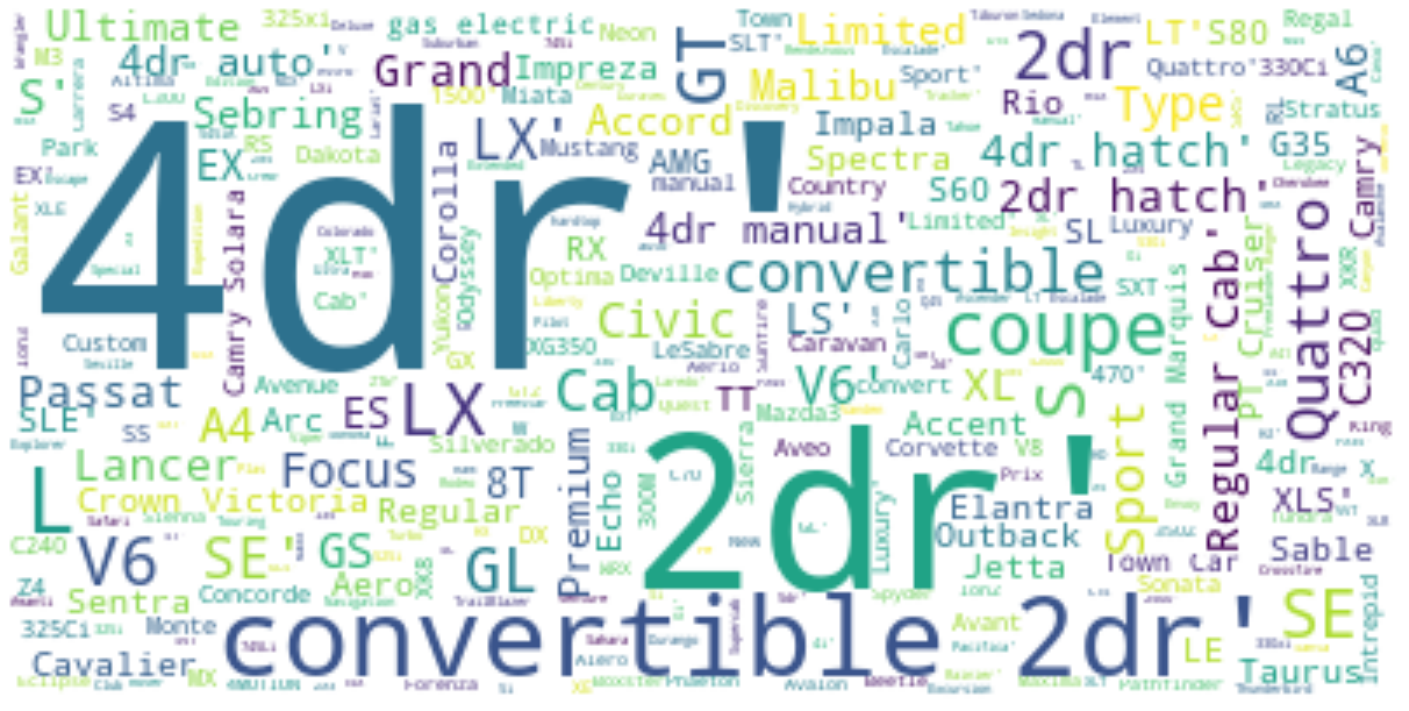

In [48]:
####################################################
# draw wordcloud for the model of the car
####################################################

text = car_data['Model'].values
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = "white", max_words = 2000, max_font_size = 100, random_state = 3, 
              stopwords = stopwords, contour_width = 3).generate(str(text))
fig = plt.figure(figsize = (25, 15))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

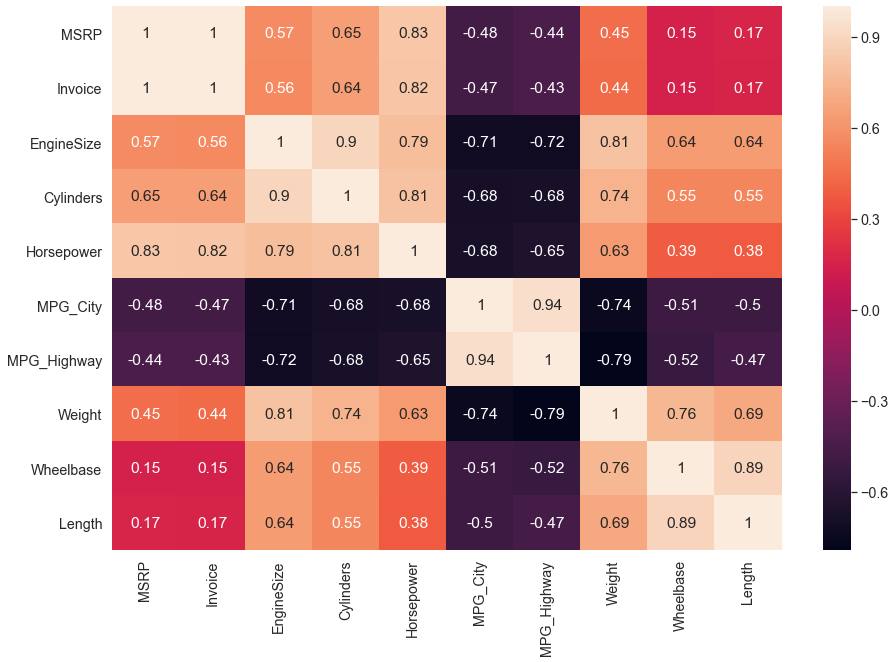

In [50]:
####################################################
# get correlation matrix for the numeric variables
####################################################
sns.set(style='darkgrid', font_scale=1.3)
fig = plt.subplots(figsize=(15,10))

sns.heatmap(car_data.corr(), annot=True)

## 3. Train the model

In [67]:
####################################################
# data pre processesing
####################################################

# drop unecessary variables - Invoice, MPG_Highway as these are high correlated to other variables
x = car_data.drop(['Invoice', 'MPG_Highway', 'MSRP'], axis=1).copy()
y = car_data['MSRP'].copy()

print('Shape x :',x.shape)

# one hot encode x
x = pd.get_dummies(x)

# Standadrdize the numeric columns
for c in x.columns:
    if x[c].dtype == 'int64' or x[c].dtype == 'float64':
        x[c] = StandardScaler().fit_transform(x[c].values.reshape(-1,1))

print('Shape x after transform :',x.shape) 

#split 80-20 training vs test data
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=1234)

print('Rows in x :', len(x))
print('Rows in train :', len(x_train))
print('Rows in test :', len(x_test))
x_train.head()

Shape x : (428, 12)
Shape x after transform : (428, 482)
Rows in x : 428
Rows in train : 342
Rows in test : 86


EngineSize  Cylinders  Horsepower  MPG_City    Weight  Wheelbase  \
24    -0.177666   0.123365    0.057343 -0.393867  0.602888   0.101877   
348   -0.900144  -1.164443   -1.057607  1.135158 -1.090829  -0.620832   
321    0.183574   0.123365   -0.569817 -0.011611 -0.606722  -0.139026   
200    0.906053   1.411173    2.426613 -0.776123  0.612121  -0.741283   
92    -0.719525  -1.164443   -0.918239  0.370645 -0.534171  -0.018574   

       Length  Make_Acura  Make_Audi  Make_BMW  ...  Type_Sedan  Type_Sports  \
24   0.393122           0          1         0  ...           0            0   
348 -0.094982           0          0         0  ...           1            0   
321 -0.025252           0          0         0  ...           1            0   
200  0.044477           0          0         0  ...           0            1   
92   0.323393           0          0         0  ...           1            0   

     Type_Truck  Type_Wagon  Origin_Asia  Origin_Europe  Origin_USA  \
24            0           1            0              1           0   
348           0           0            0              0           1   
321           0           0            0              0           1   
200           0           0            0              1           0   
92            0           0            0              0           1   

     DriveTrain_All  DriveTrain_Front  DriveTrain_Rear  
24                1                 0                0  
348               0                 1                0  
321               0                 1                0  
200               0                 0                1  
92                0                 1                0  

[5 rows x 482 columns]

*******************************************
Model Name : Linear Reg
Accuracy on test data : 71.0 %


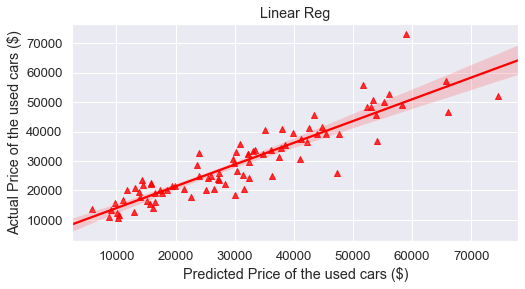

*******************************************
Model Name : Decision Tree
Accuracy on test data : 77.4 %


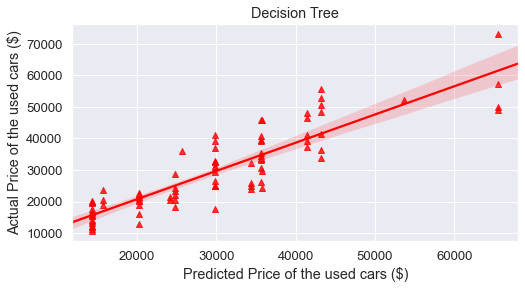

*******************************************
Model Name : Random Forest
Accuracy on test data : 82.4 %


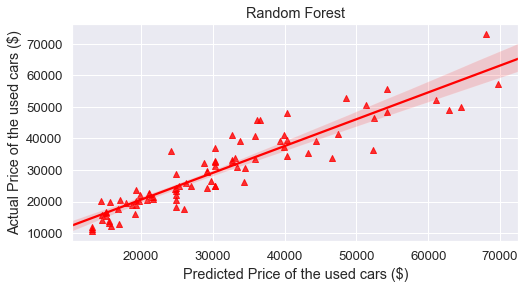

*******************************************
Model Name : XGBoost
Accuracy on test data : 87.4 %


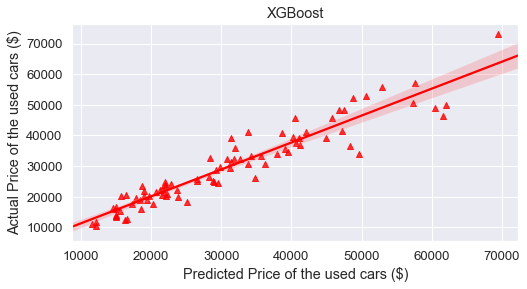

In [80]:
####################################################
# Types of models trained - 
# Simple Linear Reg
# Decision Tree Reg
# Random Forest Reg
# XGBoost Reg
####################################################

model_names = ["Linear Reg", "Decision Tree", "Random Forest", "XGBoost"]

model_param = [
    LinearRegression(),
    DecisionTreeRegressor(max_depth=5, random_state=123),
    RandomForestRegressor(n_estimators=10, max_depth=5, random_state=123),
    XGBRegressor()]

model_compare = pd.DataFrame(columns=['model_name', 'rmse', 'mse', 'mae', 'r2'])
rn = 0

for name, model in zip(model_names, model_param):
    reg_model = model.fit(x_train, y_train)
    
    model_pred = reg_model.predict(x_test)
    
    rmse = np.round(np.sqrt(mean_squared_error(y_test, model_pred)),1)
    mse = np.round(mean_squared_error(y_test, model_pred),1)
    mae = np.round(mean_absolute_error(y_test, model_pred),1)
    r2 = np.round(r2_score(y_test, model_pred),3)
    
    # print the results
    print('*******************************************')
    print('Model Name :', name)
    print('Accuracy on test data :', np.round(100*reg_model.score(x_test, y_test),1), '%')
    
    temp = [name, rmse, mse, mae, r2]
    model_compare.loc[rn] = temp
    rn = rn + 1
    
    sns.set(style='darkgrid', font_scale=1.2)
    fig = plt.subplots(figsize=(8,4))
    
    fig = sns.regplot(model_pred, y_test, color = 'red', marker = "^")
    fig.set(title = name, xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")
    plt.show()

In [81]:
# show the other metrics for model comparison
model_compare

model_name    rmse         mse     mae     r2
0     Linear Reg  6804.0  46294179.3  5036.9  0.710
1  Decision Tree  6000.4  36005109.5  4714.6  0.774
2  Random Forest  5297.5  28063013.8  3807.2  0.824
3        XGBoost  4484.2  20108205.2  3125.7  0.874

from the above metrics we can clearly see that the **XGBoost Regression** methodology provided the most accuracy for the model.